In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split 
from sklearn.datasets import make_blobs 
from sklearn import svm

%matplotlib inline
#plt.rcParams['figure.figsize'] = (10,6)
#plt.rcParams['figure.dpi'] = 100
#sns.set()

#%matplotlib inline
#%load_ext autoreload
#%autoreload 2

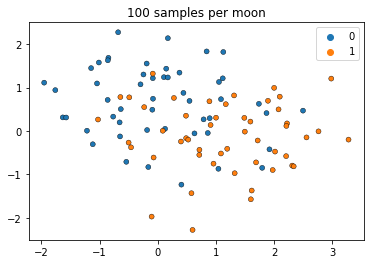

In [2]:
X, y = make_moons(n_samples=100, noise=0.8)
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y, marker="o", s=25, edgecolor="k", legend=True).set_title("100 samples per moon")
plt.show()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [3]:
model= svm.LinearSVC()
model.fit(X_train, y_train)

LinearSVC()

In [4]:
def make_meshgrid(x1, x2, h=0.2):
    
    x1_min, x1_max = x1.min() - 1, x1.max() + 1
    x2_min, x2_max = x2.min() - 1, x2.max() + 1
    x1x1, x2x2 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))
    
    return x1x1, x2x2


def plot_contours(ax, classifier, x1x1, x2x2, **params):

    contours = classifier.predict(np.c_[x1x1.ravel(), x2x2.ravel()])
    contours = contours.reshape(x1x1.shape)

    return ax.contourf(x1x1, x2x2, contours, **params)

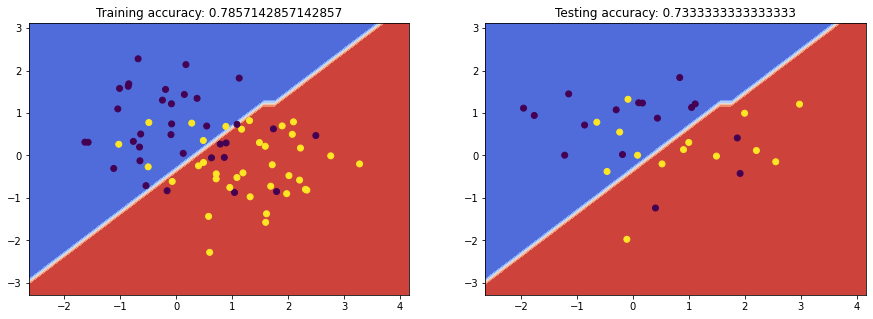

In [5]:
accuracy_train = model.score(X_train, y_train)
accuracy_test = model.score(X_test, y_test)

X_0, X_1 = X_train[:, 0], X_train[:, 1]
x1x1, x2x2 = make_meshgrid(X_0, X_1)
contours = model.predict(np.c_[x1x1.ravel(), x2x2.ravel()])
contours = contours.reshape(x1x1.shape)

fig,ax=plt.subplots(1,2,figsize=(15,5))
ax[0].contourf(x1x1, x2x2, contours, cmap=plt.cm.coolwarm)
ax[0].scatter(X_0, X_1, c=y_train)
ax[0].set_title('Training accuracy: '+ str(accuracy_train));

ax[1].contourf(x1x1, x2x2, contours, cmap=plt.cm.coolwarm)
ax[1].scatter(X_test[:,0], X_test[:,1], c=y_test)
ax[1].set_title('Testing accuracy: '+ str(accuracy_test));

In [6]:
classifier = svm.SVC(gamma = 'scale')
classifier.fit(X_train, y_train);

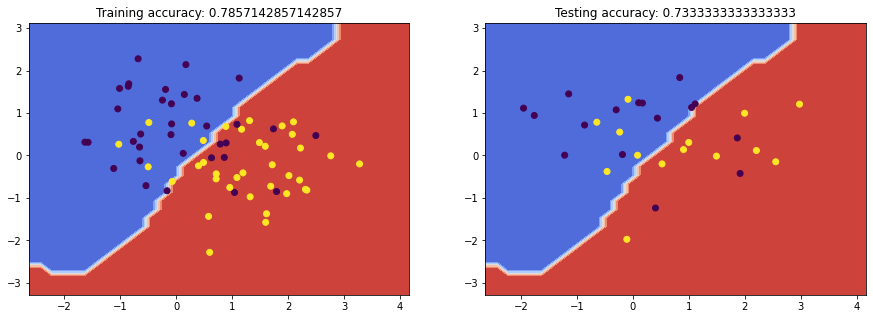

In [7]:
accuracy_train = classifier.score(X_train, y_train)
accuracy_test = classifier.score(X_test, y_test)


X_0, X_1 = X_train[:, 0], X_train[:, 1]
x1x1, x2x2 = make_meshgrid(X_0, X_1)
contours = classifier.predict(np.c_[x1x1.ravel(), x2x2.ravel()])
contours = contours.reshape(x1x1.shape)

fig,ax=plt.subplots(1,2,figsize=(15,5))
ax[0].contourf(x1x1, x2x2, contours, cmap=plt.cm.coolwarm)
ax[0].scatter(X_0, X_1, c=y_train)
ax[0].set_title('Training accuracy: '+ str(accuracy_train));

ax[1].contourf(x1x1, x2x2, contours, cmap=plt.cm.coolwarm)
ax[1].scatter(X_test[:,0], X_test[:,1], c=y_test)
ax[1].set_title('Testing accuracy: '+ str(accuracy_test));

In [9]:
#from qiskit.aqua.components.feature_maps import SecondOrderExpansion
from qiskit.circuit.library import ZZFeatureMap

feature_map = ZZFeatureMap(feature_dimension=2, reps=2)

In [10]:
print(feature_map)

     ┌───┐┌──────────────┐                                           ┌───┐»
q_0: ┤ H ├┤ U1(2.0*x[0]) ├──■─────────────────────────────────────■──┤ H ├»
     ├───┤├──────────────┤┌─┴─┐┌───────────────────────────────┐┌─┴─┐├───┤»
q_1: ┤ H ├┤ U1(2.0*x[1]) ├┤ X ├┤ U1(2.0*(π - x[0])*(π - x[1])) ├┤ X ├┤ H ├»
     └───┘└──────────────┘└───┘└───────────────────────────────┘└───┘└───┘»
«     ┌──────────────┐                                           
«q_0: ┤ U1(2.0*x[0]) ├──■─────────────────────────────────────■──
«     ├──────────────┤┌─┴─┐┌───────────────────────────────┐┌─┴─┐
«q_1: ┤ U1(2.0*x[1]) ├┤ X ├┤ U1(2.0*(π - x[0])*(π - x[1])) ├┤ X ├
«     └──────────────┘└───┘└───────────────────────────────┘└───┘
